# Used Car Pricing Analysis

## A. Problem Description and Initial Data Analysis 

1. Business problem & use case
2. Evaluation Criteria
3. Data overview
4. Missing data assessment
5. Initial price characteristics

### 1. Business Problem & Use Case
This project develops a data-driven model to predict used-car prices using key vehicle attributes. The model supports sales teams by providing consistent price estimates, identifying key price drivers, and highlighting pricing risk, helping reduce reliance on intuition and improve confidence in pricing decisions.

### 2. Evaluation Criteria
The performance of the forecast model will be evaluated using Mean Squared Error (MSE). A lower MSE indicates a more accurate model, as it penalizes larger errors by squaring the deviations.
The Mean Squared Error (MSE) is calculated as:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

where:

- $ n $ is the number of observations
- $ y_i $ represents the actual values
- $ \hat{y}_i $ represents the predicted values


### 3. Data overview
| Variable Type                 | Variables                                                                                                                                  |
|-------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| **Categorical Variables (Nominal)** | vin, body_type, city, engine_type, exterior_color, franchise_dealer, fuel_type, interior_color, is_new, listing_color, make_name, model_name, transmission, transmission_display, wheel_system                                                                                                           |
| **Numerical Variables (Continuous)** | daysonmarket, engine_displacement, horsepower, latitude, longitude, mileage, savings_amount, seller_rating, highway_fuel_economy, city_fuel_economy, price |
| **Numerical Variables (Discrete)** | year, dealer_zip |
| **Date variable**   | listed_date                                                                                                    |
| **String Variables with Units**      |back_legroom, front_legroom, height, maximum_seating, wheelbase, width, power, torque                                                  |

### 4. Missing data assessment

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [12]:
training_missing_values = train.isnull().sum()
columns_with_missing1 = test.isnull().sum()[train.isnull().sum() > 0].count()
print(f"Number of variables with missing values: {columns_with_missing1}")
training_missing_columns = training_missing_values[training_missing_values > 0]
print("Number of missing values for training", training_missing_columns.sum())
print(training_missing_columns)

Number of variables with missing values: 17
,Number of missing values for training 2061
,back_legroom              7
,exterior_color          117
,franchise_dealer        102
,front_legroom             7
,height                    7
,interior_color          924
,latitude                139
,maximum_seating           7
,mileage                 331
,power                     5
,savings_amount          121
,seller_rating            99
,transmission             89
,transmission_display     89
,wheel_system              3
,wheelbase                 7
,width                     7
,dtype: int64


Overall, 17 variables (columns) in the training dataset have missing values, with a total of 2,061 values. They require attention as some critical features like mileage, interior_color, seller_rating, and franchise_dealer have huge gaps.

In [14]:
testing_missing_values = test.isnull().sum()
columns_with_missing2 = test.isnull().sum()[test.isnull().sum() > 0].count()
print(f"Number of variables with missing values: {columns_with_missing2}")
testing_missing_columns = testing_missing_values[testing_missing_values > 0]
print("Number of missing values for training", testing_missing_columns.sum())
print(testing_missing_columns)

Number of variables with missing values: 24
,Number of missing values for training 3442
,back_legroom             32
,city_fuel_economy       455
,engine_displacement      40
,engine_type              72
,exterior_color           64
,franchise_dealer         46
,front_legroom            32
,fuel_type                54
,height                   32
,highway_fuel_economy    455
,horsepower               40
,interior_color          521
,latitude                 71
,maximum_seating          32
,mileage                 205
,power                   447
,savings_amount           59
,seller_rating            43
,torque                  505
,transmission             78
,transmission_display     78
,wheel_system             17
,wheelbase                32
,width                    32
,dtype: int64


The test data shows a doubled number of missing values, totaling 3,442, spread across 24 columns. These gaps may need to be filled using imputation techniques.

### 5. Initial price characteristics

In [16]:
train.describe().round(2)

,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,savings_amount,seller_rating,year,price
count,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,7861.00,8000.00,7669.00,7879.00,7901.00,8000.00,8000.00
mean,21.38,76.51,50482.17,2919.19,28.55,247.28,36.97,-90.52,31499.72,559.15,4.26,2017.72,29018.59
std,4.83,105.71,27232.71,1225.84,5.62,88.33,5.04,13.80,44027.28,954.97,0.52,3.64,17479.24
min,10.00,0.00,1060.00,1000.00,13.00,74.00,24.57,-123.40,0.00,0.00,1.00,1988.00,1700.00
25%,18.00,15.00,30012.75,2000.00,24.00,175.00,33.49,-96.88,7.00,0.00,4.00,2017.00,17980.00
50%,21.00,36.00,48053.50,2500.00,28.00,245.00,37.96,-87.02,12225.00,0.00,4.33,2019.00,25591.00
75%,25.00,82.00,76303.75,3500.00,32.00,300.00,40.98,-80.61,44876.00,833.50,4.61,2020.00,37221.75
max,70.00,1259.00,99362.00,6600.00,75.00,717.00,48.86,-68.00,283408.00,12977.00,5.00,2021.00,314900.00


The dataset covers car models from 1988 to 2021, with most listings concentrated in newer vehicles (average model year: 2017). 

Prices span a wide range, averaging around $29,000, while mileage varies significantly, reflecting both lightly and heavily used cars. Fuel efficiency averages align with typical city and highway standards. 

Seller ratings are generally high, though some variation indicates differences in seller quality.

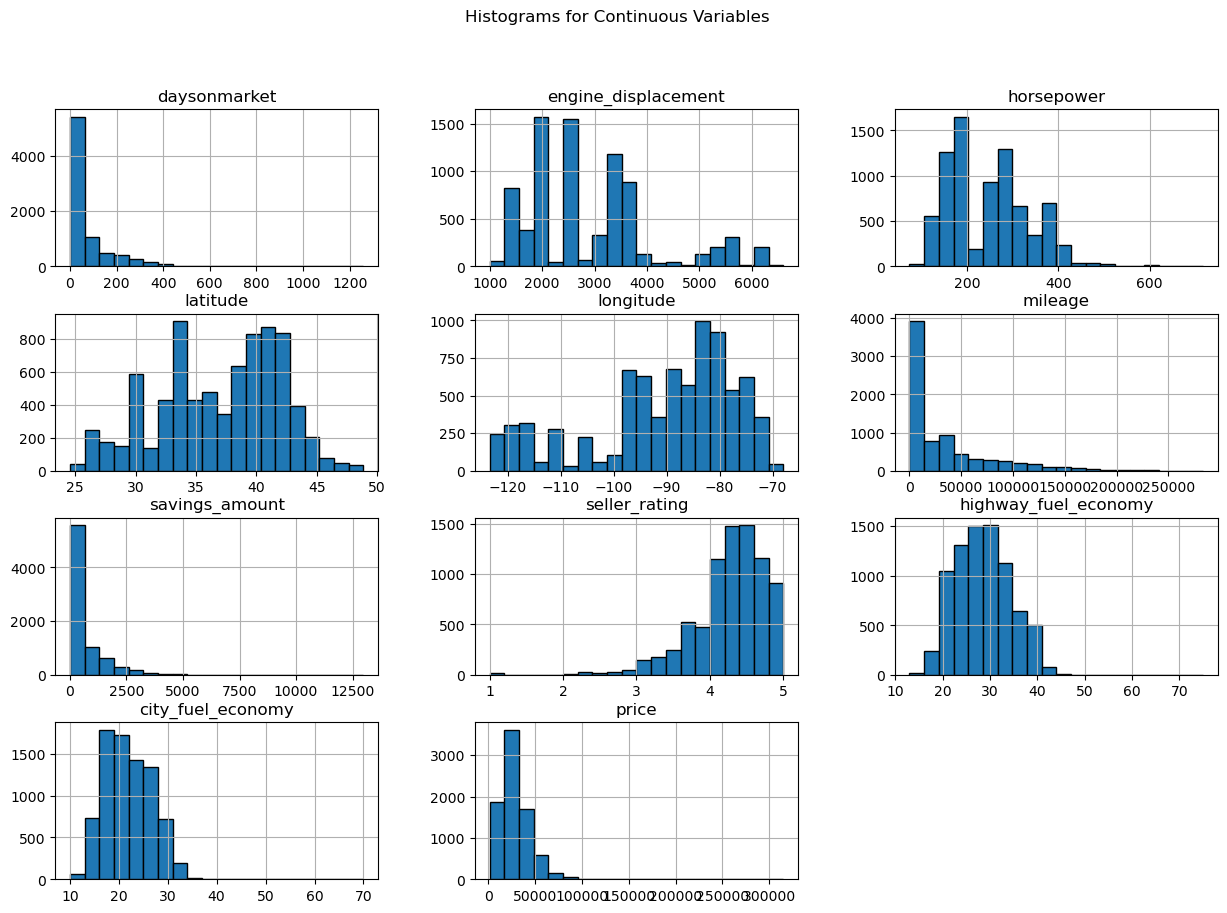

In [18]:
continuous_variables = ['daysonmarket', 'engine_displacement', 'horsepower', 'latitude', 'longitude', 'mileage', 'savings_amount', 'seller_rating', 'highway_fuel_economy', 'city_fuel_economy', 'price']
train[continuous_variables].hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms for Continuous Variables')
plt.show()

Variables such as daysonmarket, mileage, price, and savings_amount show a right-skewed distribution, seller_rating shows a left-skewed distribution indicating the presence of outliers or larger values. Tranformation techniques to make them into normal distribution like log transformation could be adopted. 

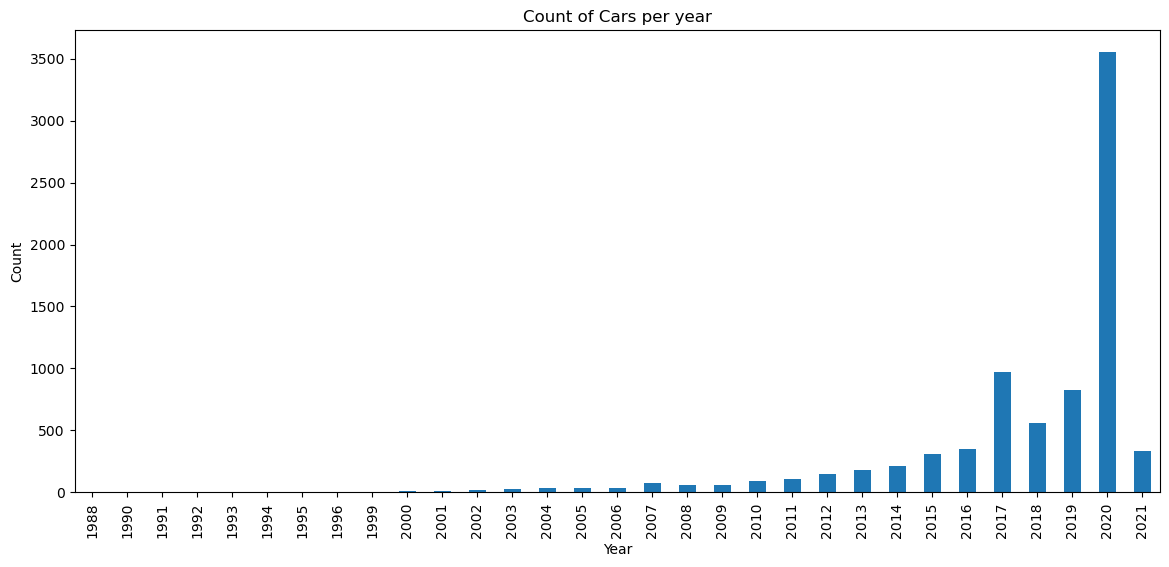

In [20]:
year_counts = train['year'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
year_counts.plot(kind='bar')
plt.title('Count of Cars per year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

The trend reveals that cars manufactured in earlier years had very low counts. 
- Starting around 2015, there was a noticeable increase in the number of cars listed each year. This trend peaked dramatically for 2020, with the count reaching over 3,500, far exceeding previous years.
- The count dropped significantly for 2021, possibly because fewer cars from this recent year were available for sale or because the dataset may be incomplete for this year.

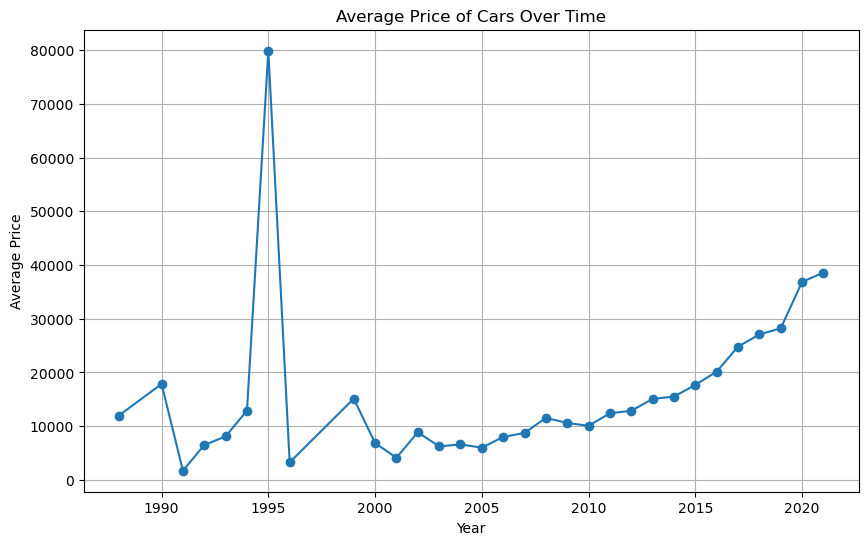

In [22]:
import seaborn as sns
price_over_time = train.groupby('year')['price'].mean()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(price_over_time.index, price_over_time.values, marker='o', linestyle='-')
plt.title('Average Price of Cars Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

The average car price spiked significantly in 1995, likely due to outliers. After this, prices remained stable or low until around 2010, when they began gradually increasing, with the highest averages in recent years.

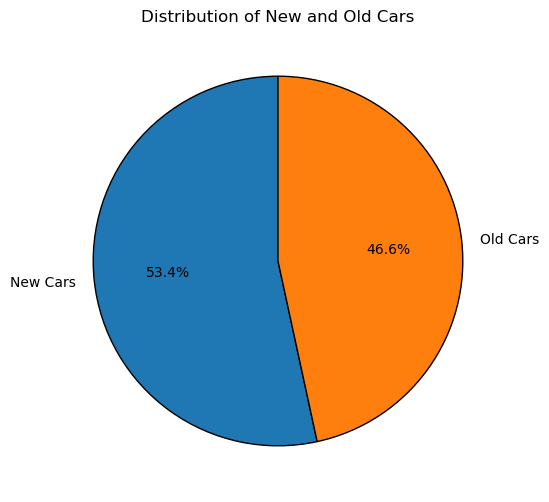

In [24]:
import matplotlib.pyplot as plt

# Create a pie chart for the 'is_new' column in the train dataset
is_new_counts = train['is_new'].value_counts()
labels = ['New Cars', 'Old Cars']

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(is_new_counts, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of New and Old Cars')
plt.show()

For distribution of new and old cars in the dataset, the split is fairly close, with approximately 53.4% new cars and 46.6% old cars. This visual confirms that there is a balanced representation between the two categories.

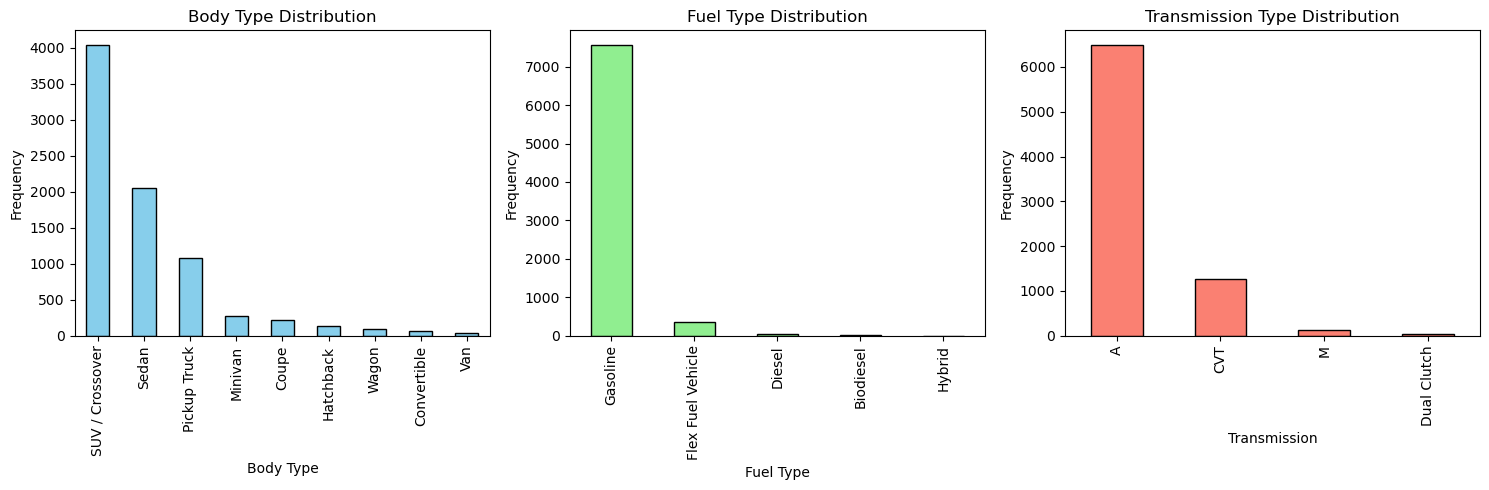

In [26]:
categorical_variables = ['body_type', 'fuel_type', 'transmission']

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
train['body_type'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Body Type Distribution')
plt.xlabel('Body Type')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
train['fuel_type'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
train['transmission'].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Transmission Type Distribution')
plt.xlabel('Transmission')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The distributions show a small number of categories dominate in body type, fuel, and transmission systems, with one option significantly more frequent than others. This indicates limited diversity in certain characteristics across the dataset.

---

## B. Data Preparation and Feature Engineering

**1.** Standardised numerical features by extracting valid numeric values and removing text to ensure consistency for model training.

In [31]:
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [32]:
# List of columns with mixed numerical and categorical values
num_cat_col = ["height", "back_legroom", "wheelbase", "width","front_legroom"]
seating_col = "maximum_seating"

# Loop over both datasets
for df in [train, test]:
    for column in num_cat_col:
        df[column] = df[column].str.replace('in','', regex=True)
        df[column] = pd.to_numeric(df[column], errors='coerce')

    # Handle 'maximum_seating' column
    df["maximum_seating"] = df["maximum_seating"].str.replace('seats', '', regex=True)
    df["maximum_seating"] = pd.to_numeric(df["maximum_seating"], errors='coerce')

Mixed numeric–categorical columns were cleaned by stripping text units and converting values to numeric types, with invalid entries handled as missing values. This ensured consistent feature formats across training and test datasets for modelling.

**2.** Engineered new features by decomposing compound variables into separate, meaningful numerical attributes to improve model learning.


In [35]:
for df in [train, test]:
    # Split 'power' into 'hp_power' and 'rpm_power' and drop the original 'power' column
    df['power_max'] = df['power'].str.extract(r'(\d+)\s*hp').astype(float)
    df['rpm_power'] = df['power'].str.extract(r'(\d+,\d+)\s*RPM').replace(',', '', regex=True).astype(float)
    df.drop(columns=['power'], inplace=True)

    # Split 'torque' into 'torque_lb' and 'rpm_torque' and drop the original 'torque' column
    df['torque_max'] = df['torque'].str.extract(r'(\d+)\s*lb-ft').astype(float)  # Extracts the torque value
    df['rpm_torque'] = df['torque'].str.extract(r'(\d+,\d+)\s*RPM').replace(',', '', regex=True).astype(float)  # Extracts the RPM value and removes commas
    df.drop(columns=['torque'], inplace=True)

    # Convert 'listed_date' to datetime format
    df['listed_date'] = pd.to_datetime(df['listed_date'], errors='coerce')

    # Extract year and month from 'listed_date'
    df['listed_year'] = df['listed_date'].dt.year.astype(int)
    df['listed_month'] = df['listed_date'].dt.month.astype(int)
    df.drop(columns=['listed_date'], inplace=True)

    # Extract number of gears from 'transmission_display' and convert to float for NaN handling
    df['number_of_gears(speed)'] = df['transmission_display'].str.extract(r'(\d+)-Speed').astype(float)
    df.drop(columns=['transmission_display'], inplace=True)

Both training and test datasets were transformed by extracting structured numerical features. 

Power and torque were split into value and RPM components, listing dates into year and month, and transmission details into gear counts. 

**3.** Imputed missing values across all features to ensure modelling readiness.

In [38]:
# Select categorical columns (object type) from train and test datasets
train_cat_col = train.select_dtypes(include='object').columns.tolist()
test_cat_col = test.select_dtypes(include='object').columns.tolist()

# Remove 'vin' if it exists in the list of categorical columns
if 'vin' in train_cat_col:
    train_cat_col.remove('vin')
if 'vin' in test_cat_col:
    test_cat_col.remove('vin')
# Select numerical columns (float64 and int64) from train and test datasets
train_num_col = train.select_dtypes(include=['float64', 'int64']).columns
test_num_col = test.select_dtypes(include=['float64', 'int64']).columns

# Replace infinity values in numerical data with NaN
train[train_num_col] = train[train_num_col].replace([np.inf, -np.inf], np.nan)
test[test_num_col] = test[test_num_col].replace([np.inf, -np.inf], np.nan)

Categorical and numerical features were systematically defined for both datasets, excluding unique identifiers and handling invalid numeric values. Infinite values were replaced with missing values to ensure stable preprocessing and model training.

In [39]:
# Replace NaN values with 0 in number_of_gears(speed) column
train['number_of_gears(speed)'] = train['number_of_gears(speed)'].fillna(0)
test['number_of_gears(speed)'] = test['number_of_gears(speed)'].fillna(0)

train['is_new'] = train['is_new'].astype('category')
test['is_new'] = test['is_new'].astype('category')

# Define imputers
mean_impute = SimpleImputer(strategy='mean')
mode_impute = SimpleImputer(strategy='most_frequent')

# Impute categorical columns
train[train_cat_col] = mode_impute.fit_transform(train[train_cat_col])
test[test_cat_col] = mode_impute.fit_transform(test[test_cat_col])

# Impute numerical columns
train[train_num_col] = mean_impute.fit_transform(train[train_num_col])
test[test_num_col] = mean_impute.fit_transform(test[test_num_col])

Missing values were imputed using mean-based strategies for numerical features and mode-based strategies for categorical features, with selected variables converted to appropriate data types. This ensured consistent and complete inputs for modelling.

In [40]:
train_num_col = train_num_col.drop(['dealer_zip'])
train_num_col

Index(['back_legroom', 'city_fuel_economy', 'daysonmarket',
       'engine_displacement', 'front_legroom', 'height',
       'highway_fuel_economy', 'horsepower', 'latitude', 'longitude',
       'maximum_seating', 'mileage', 'savings_amount', 'seller_rating',
       'wheelbase', 'width', 'year', 'price', 'power_max', 'rpm_power',
       'torque_max', 'rpm_torque', 'number_of_gears(speed)'],
      dtype='object')

Drop the dealer_zip because it stands for a location and it is not meaningful for the model

In [42]:
train_cat_col

['body_type',
 'city',
 'engine_type',
 'exterior_color',
 'franchise_dealer',
 'fuel_type',
 'interior_color',
 'listing_color',
 'make_name',
 'model_name',
 'transmission',
 'wheel_system']

In [43]:
test_cat_col

['body_type',
 'city',
 'engine_type',
 'exterior_color',
 'franchise_dealer',
 'fuel_type',
 'interior_color',
 'listing_color',
 'make_name',
 'model_name',
 'transmission',
 'wheel_system']

**4.** Encoded categorical variables into model-ready formats to ensure consistency and compatibility during training and evaluation.

Categorical features containing multiple values were standardised by grouping them into an “other” category across both training and test datasets.

In [47]:
def map_top_5_frequent(train, test, train_cat_col, test_cat_col):
    # Process the train dataset
    for col in train_cat_col:

        # Get the 5 most frequent values in the train dataset
        top_5_values = train[col].value_counts().nlargest(5).index

        # Map values outside of the top 5 to 'other' in the train dataset
        train[col] = train[col].where(train[col].isin(top_5_values), 'Other')

    # Process the test dataset
    for col in test_cat_col:

        # Get the 5 most frequent values in the test dataset
        top_5_values = test[col].value_counts().nlargest(5).index

        # Map values outside of the top 5 to 'other' in the test dataset
        test[col] = test[col].where(test[col].isin(top_5_values), 'Other')

    return train, test

# Apply the function to both train and test datasets
train_encoded, test_encoded = map_top_5_frequent(train, test, train_cat_col, test_cat_col)

Categorical features were simplified by retaining the top five most frequent categories and grouping all less common values into an “Other” category. 

This reduced category sparsity and noise while preserving the most informative values. 

In [48]:
train_encoded

,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,engine_type,exterior_color,...,width,year,price,power_max,rpm_power,torque_max,rpm_torque,listed_year,listed_month,number_of_gears(speed)
0,JTEBU17R79K040807,34.6,SUV / Crossover,Other,16.0,36.0,68008.0,4000.0,V6,White,...,75.2,2009.0,14800.0,236.0,5200.0,266.0,4000.0,2020,8,0.0
1,1C4PJLCB4KD487354,40.3,SUV / Crossover,Other,22.0,426.0,61938.0,2400.0,I4,Other,...,73.2,2019.0,26445.0,271.0,6500.0,239.0,4400.0,2019,7,9.0
2,JN1CV6AR2CM674889,34.7,Sedan,Other,18.0,5.0,22150.0,3700.0,V6,Other,...,69.8,2012.0,14000.0,328.0,7000.0,269.0,5200.0,2020,9,0.0
3,2HKRW2H21LH660837,40.4,SUV / Crossover,Other,27.0,22.0,59801.0,1500.0,I4,Other,...,73.0,2020.0,26293.0,190.0,5600.0,179.0,2000.0,2020,8,0.0
4,3GTU9DED7LG361736,43.4,Pickup Truck,Other,16.0,57.0,75402.0,6200.0,V8,Other,...,81.2,2020.0,49223.0,277.0,3750.0,460.0,1500.0,2020,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1GTG6CEN7H1256354,35.8,Pickup Truck,Other,17.0,16.0,48150.0,3600.0,V6,Other,...,83.9,2017.0,29489.0,181.0,3400.0,369.0,2000.0,2020,8,8.0
7996,JM3KFBDM7L0757151,39.6,SUV / Crossover,Other,24.0,254.0,54937.0,2500.0,I4,Other,...,83.3,2020.0,30457.0,187.0,6000.0,186.0,4000.0,2020,1,0.0
7997,WBAJA5C37HG897984,36.5,Sedan,Other,24.0,34.0,66102.0,2000.0,I4,Other,...,83.7,2017.0,25995.0,248.0,5200.0,258.0,1500.0,2020,8,8.0
7998,JF2SJGWCXHH477291,38.0,SUV / Crossover,Other,23.0,10.0,80221.0,2000.0,H4,Other,...,80.0,2017.0,22999.0,250.0,5600.0,258.0,2000.0,2020,9,0.0


In [49]:
test_encoded

,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,engine_type,exterior_color,...,wheelbase,width,year,power_max,rpm_power,torque_max,rpm_torque,listed_year,listed_month,number_of_gears(speed)
0,5J8YD4H05LL032532,36.6,SUV / Crossover,Other,19.0,50.0,92029.0,3500.0,V6,Other,...,111.0,77.7,2020.0,290.000000,6200.0000,267.000000,4700.000000,2020,7,9.0
1,KNAE45LC8K6050784,36.4,Sedan,Other,17.0,39.0,55305.0,3300.0,V6,Other,...,114.4,73.6,2019.0,365.000000,6000.0000,376.000000,1300.000000,2020,8,8.0
2,5XYZGDABXCG149606,36.8,SUV / Crossover,Other,20.0,60.0,87110.0,2400.0,I4,Other,...,106.3,74.4,2012.0,175.000000,6000.0000,169.000000,3750.000000,2020,7,6.0
3,1G1ZE5ST6HF197903,38.1,Sedan,Other,27.0,2.0,55021.0,1500.0,I4,Other,...,111.4,73.0,2017.0,160.000000,5700.0000,184.000000,2500.000000,2020,9,6.0
4,KL4MMDSL6LB106699,36.0,SUV / Crossover,Other,30.0,141.0,39440.0,1300.0,I3,Other,...,102.2,71.4,2020.0,150.000000,5600.0000,174.000000,1500.000000,2020,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1C4NJRBB4FD168294,39.4,SUV / Crossover,Other,22.0,10.0,22801.0,2400.0,I4,Other,...,103.7,69.2,2015.0,172.000000,6000.0000,165.000000,4400.000000,2020,8,5.0
3996,1GCRWBEHXLZ340420,35.2,Pickup Truck,Other,16.0,12.0,78541.0,4300.0,Other,Other,...,147.5,81.2,2020.0,355.000000,5600.0000,383.000000,4100.000000,2020,8,6.0
3997,5N1DR2MN1KC639932,41.7,SUV / Crossover,Other,20.0,34.0,32548.0,3500.0,V6,Other,...,114.2,77.2,2019.0,284.000000,6400.0000,259.000000,4800.000000,2020,8,0.0
3998,KNDJ33AUXM7127740,38.8,SUV / Crossover,Other,28.0,46.0,76018.0,2000.0,I4,Other,...,102.4,70.9,2021.0,147.000000,6200.0000,132.000000,4500.000000,2020,7,0.0


The map_top_5_frequent function standardises categorical features by retaining the five most frequent values and mapping all others to “other.” This reduces category sparsity and improves model efficiency.

In [51]:
# Step 1: Separate the 'vin' column and keep it for later
train_vin = train_encoded['vin']
test_vin = test_encoded['vin']

# Step 2: Drop 'vin' column from train and test for processing
train_encoded = train_encoded.drop(columns='vin')
test_encoded = test_encoded.drop(columns='vin')

# Step 3: Apply one-hot encoding
train_encoded = pd.get_dummies(train_encoded, drop_first = True)
test_encoded = pd.get_dummies(test_encoded, drop_first = True)
test_encoded = test_encoded.astype(float)
train_encoded = train_encoded.astype(float)
# Step 4: Align columns between train and test data
train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1, fill_value=0)

Identifiers were excluded ("Vin" column), categorical features were one-hot encoded, and training and test datasets were aligned to ensure consistent feature structures for modelling.

**5.** Performed additional data validation and preprocessing steps to address remaining data quality issues.

## Split Datasets

In [57]:
from sklearn.model_selection import train_test_split

# Separate features and target
  # 'price' is the target variable
X = train_encoded.drop(columns='price')
y = train_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_testdata = test_encoded
X_train, X_testdata = X_train.align(X_testdata, join='left', axis=1, fill_value=0)

The target variable (price) was separated from the feature set, and the data was split into **training (70%) and validation (30%)** subsets using a fixed random state for reproducibility. Feature columns were aligned across training, validation, and test datasets by filling missing columns with zeros, ensuring consistent input structure for model training and evaluation

## Feature Importance

In [59]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit model to training data
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame with feature importances
importances_df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Sort features by importance in descending order
importances_df = importances_df.sort_values(by='importance', ascending=False).reset_index(drop=True)

# Create a cumulative importance column in importance_df
importances_df['cum_importance'] = importances_df['importance'].cumsum()

# Filter features based on cumulative importance (e.g., threshold = 0.995)
importances_df_filtered = importances_df[importances_df['cum_importance'] <= 0.995]

# Save the list of variables that have significant importance
filtered_features = importances_df_filtered['feature'].tolist()

# Display the filtered features
print("Filtered Features based on cumulative importance:")
print(importances_df_filtered)

Filtered Features based on cumulative importance:
,                      feature  importance  cum_importance
,0                  torque_max    0.216049        0.216049
,1                  horsepower    0.211997        0.428046
,2                     mileage    0.151741        0.579787
,3                        year    0.102879        0.682666
,4                   power_max    0.086482        0.769148
,5                  rpm_torque    0.029770        0.798918
,6                   wheelbase    0.017968        0.816886
,7         engine_displacement    0.014003        0.830889
,8                   rpm_power    0.013234        0.844123
,9                      height    0.011925        0.856048
,10                      width    0.011095        0.867143
,11                is_new_True    0.010642        0.877786
,12              seller_rating    0.010015        0.887800
,13             savings_amount    0.009355        0.897155
,14            maximum_seating    0.009065        0.906220
,15   

A Random Forest Regressor was trained on the training data to assess feature importance in predicting car prices. Feature importances were ranked and accumulated, retaining only features contributing up to **99.5% of cumulative importance**. This reduced dimensionality while preserving predictive power, resulting in a refined set of influential features for subsequent modelling.

## Standardize data

In [61]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define numerical features
numerical_features = [
    'back_legroom', 'city_fuel_economy', 'daysonmarket',
    'engine_displacement', 'front_legroom', 'height', 'listed_month',
    'highway_fuel_economy', 'horsepower', 'latitude', 'longitude',
    'maximum_seating', 'mileage', 'savings_amount', 'seller_rating',
    'wheelbase', 'width', 'year', 'power_max', 'rpm_power',
    'torque_max', 'rpm_torque', 'number_of_gears(speed)'
]

# Instantiate the scaler
scaler = StandardScaler()

# Scale the numerical features for train, test, and testdata
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_features])
X_test_scaled_numerical = scaler.transform(X_test[numerical_features])
X_testdata_scaled_numerical = scaler.transform(X_testdata[numerical_features])

# Convert scaled numerical features to DataFrames with the same column names and indices
X_train_scaled_numerical = pd.DataFrame(X_train_scaled_numerical, columns=numerical_features, index=X_train.index)
X_test_scaled_numerical = pd.DataFrame(X_test_scaled_numerical, columns=numerical_features, index=X_test.index)
X_testdata_scaled_numerical = pd.DataFrame(X_testdata_scaled_numerical, columns=numerical_features, index=X_testdata.index)

# Combine scaled numerical features with remaining unscaled features
X_train_scaled = pd.concat([X_train_scaled_numerical, X_train[filtered_features].drop(columns=numerical_features)], axis=1)
X_test_scaled = pd.concat([X_test_scaled_numerical, X_test[filtered_features].drop(columns=numerical_features)], axis=1)
X_testdata_scaled = pd.concat([X_testdata_scaled_numerical, X_testdata[filtered_features].drop(columns=numerical_features)], axis=1)

Numerical features were standardised across the training, validation, and test datasets using StandardScaler to ensure consistent scaling. The scaler was fitted on the training data and applied to the remaining datasets to prevent data leakage. Scaled numerical features were then recombined with the selected unscaled features, producing final model-ready datasets optimised for stable and reliable price prediction.

---
## C. Fit and tune a forecasting model, submit predictions & win competition

1. Perform some EDA to measure the relationship between the features and the target variable, and carefully explain your findings.

2. Choose and carefully explain 3 different machine learning (ML) regression models that you will apply in this competition.
   
3. Train the models and tune their hyperparameters via cross-validation. Discuss the fitted weights, optimised hyperparameter values, and their training dataset predictive performance. 

4. Select the best model and create predictions of the test dataset.
5. Suggest ways to improve your ranking and implement them.

## **EDA**

### Feature correlations with 'Price'

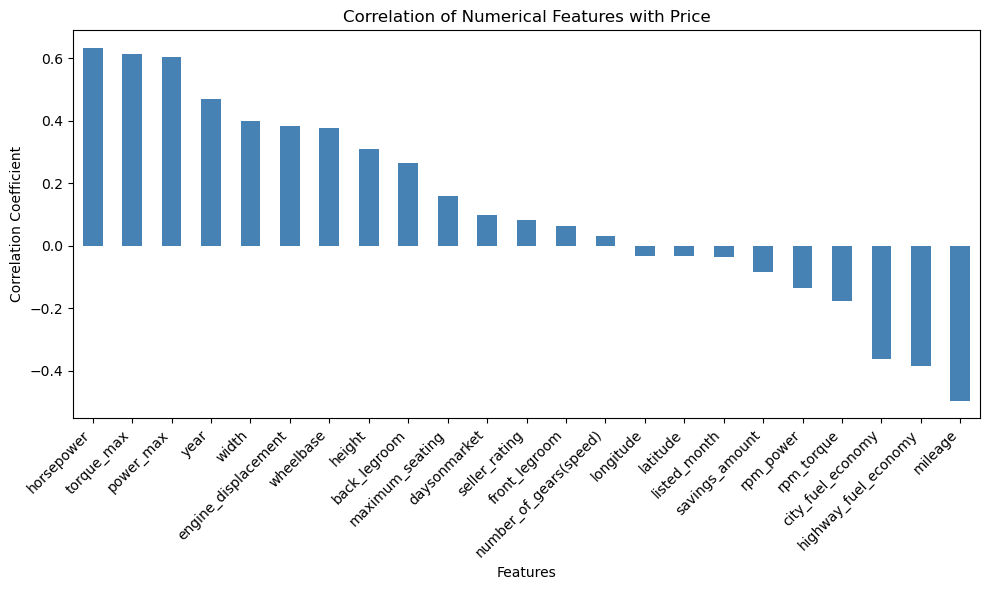

<Figure size 640x480 with 0 Axes>

In [66]:
# Correlation of 'price' with other numerical features
X_train_with_target = X_train.copy()
X_train_with_target['y_train'] = y_train

price_correlation = X_train_with_target[numerical_features + ['y_train']].corr()['y_train'].sort_values(ascending=False)

# Plotting the correlations of price with numerical features
plt.figure(figsize=(10, 6))
price_correlation.drop('y_train').plot(kind='bar', color='steelblue')
plt.title('Correlation of Numerical Features with Price')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.savefig('price corr', dpi=300, bbox_inches='tight')

- The correlations of the features to the target variables are being sorted so that the most significant variables with price are better visualised and the weaker relationships are easier to identify, as they are presented in the middle part of the chart.
- The figure shows that:
  + The variables that have a strong positive relationship to price are engine displacement, horsepower, wheelbase, width, year, maximum power, and maximum torque.
  + Those that have a significant negative relationship to price are city_fuel_economy, highway_fuel_economy, mileage, and front legroom.
  + The remaining variables are non-related or have a weak relationship to the target variable price.


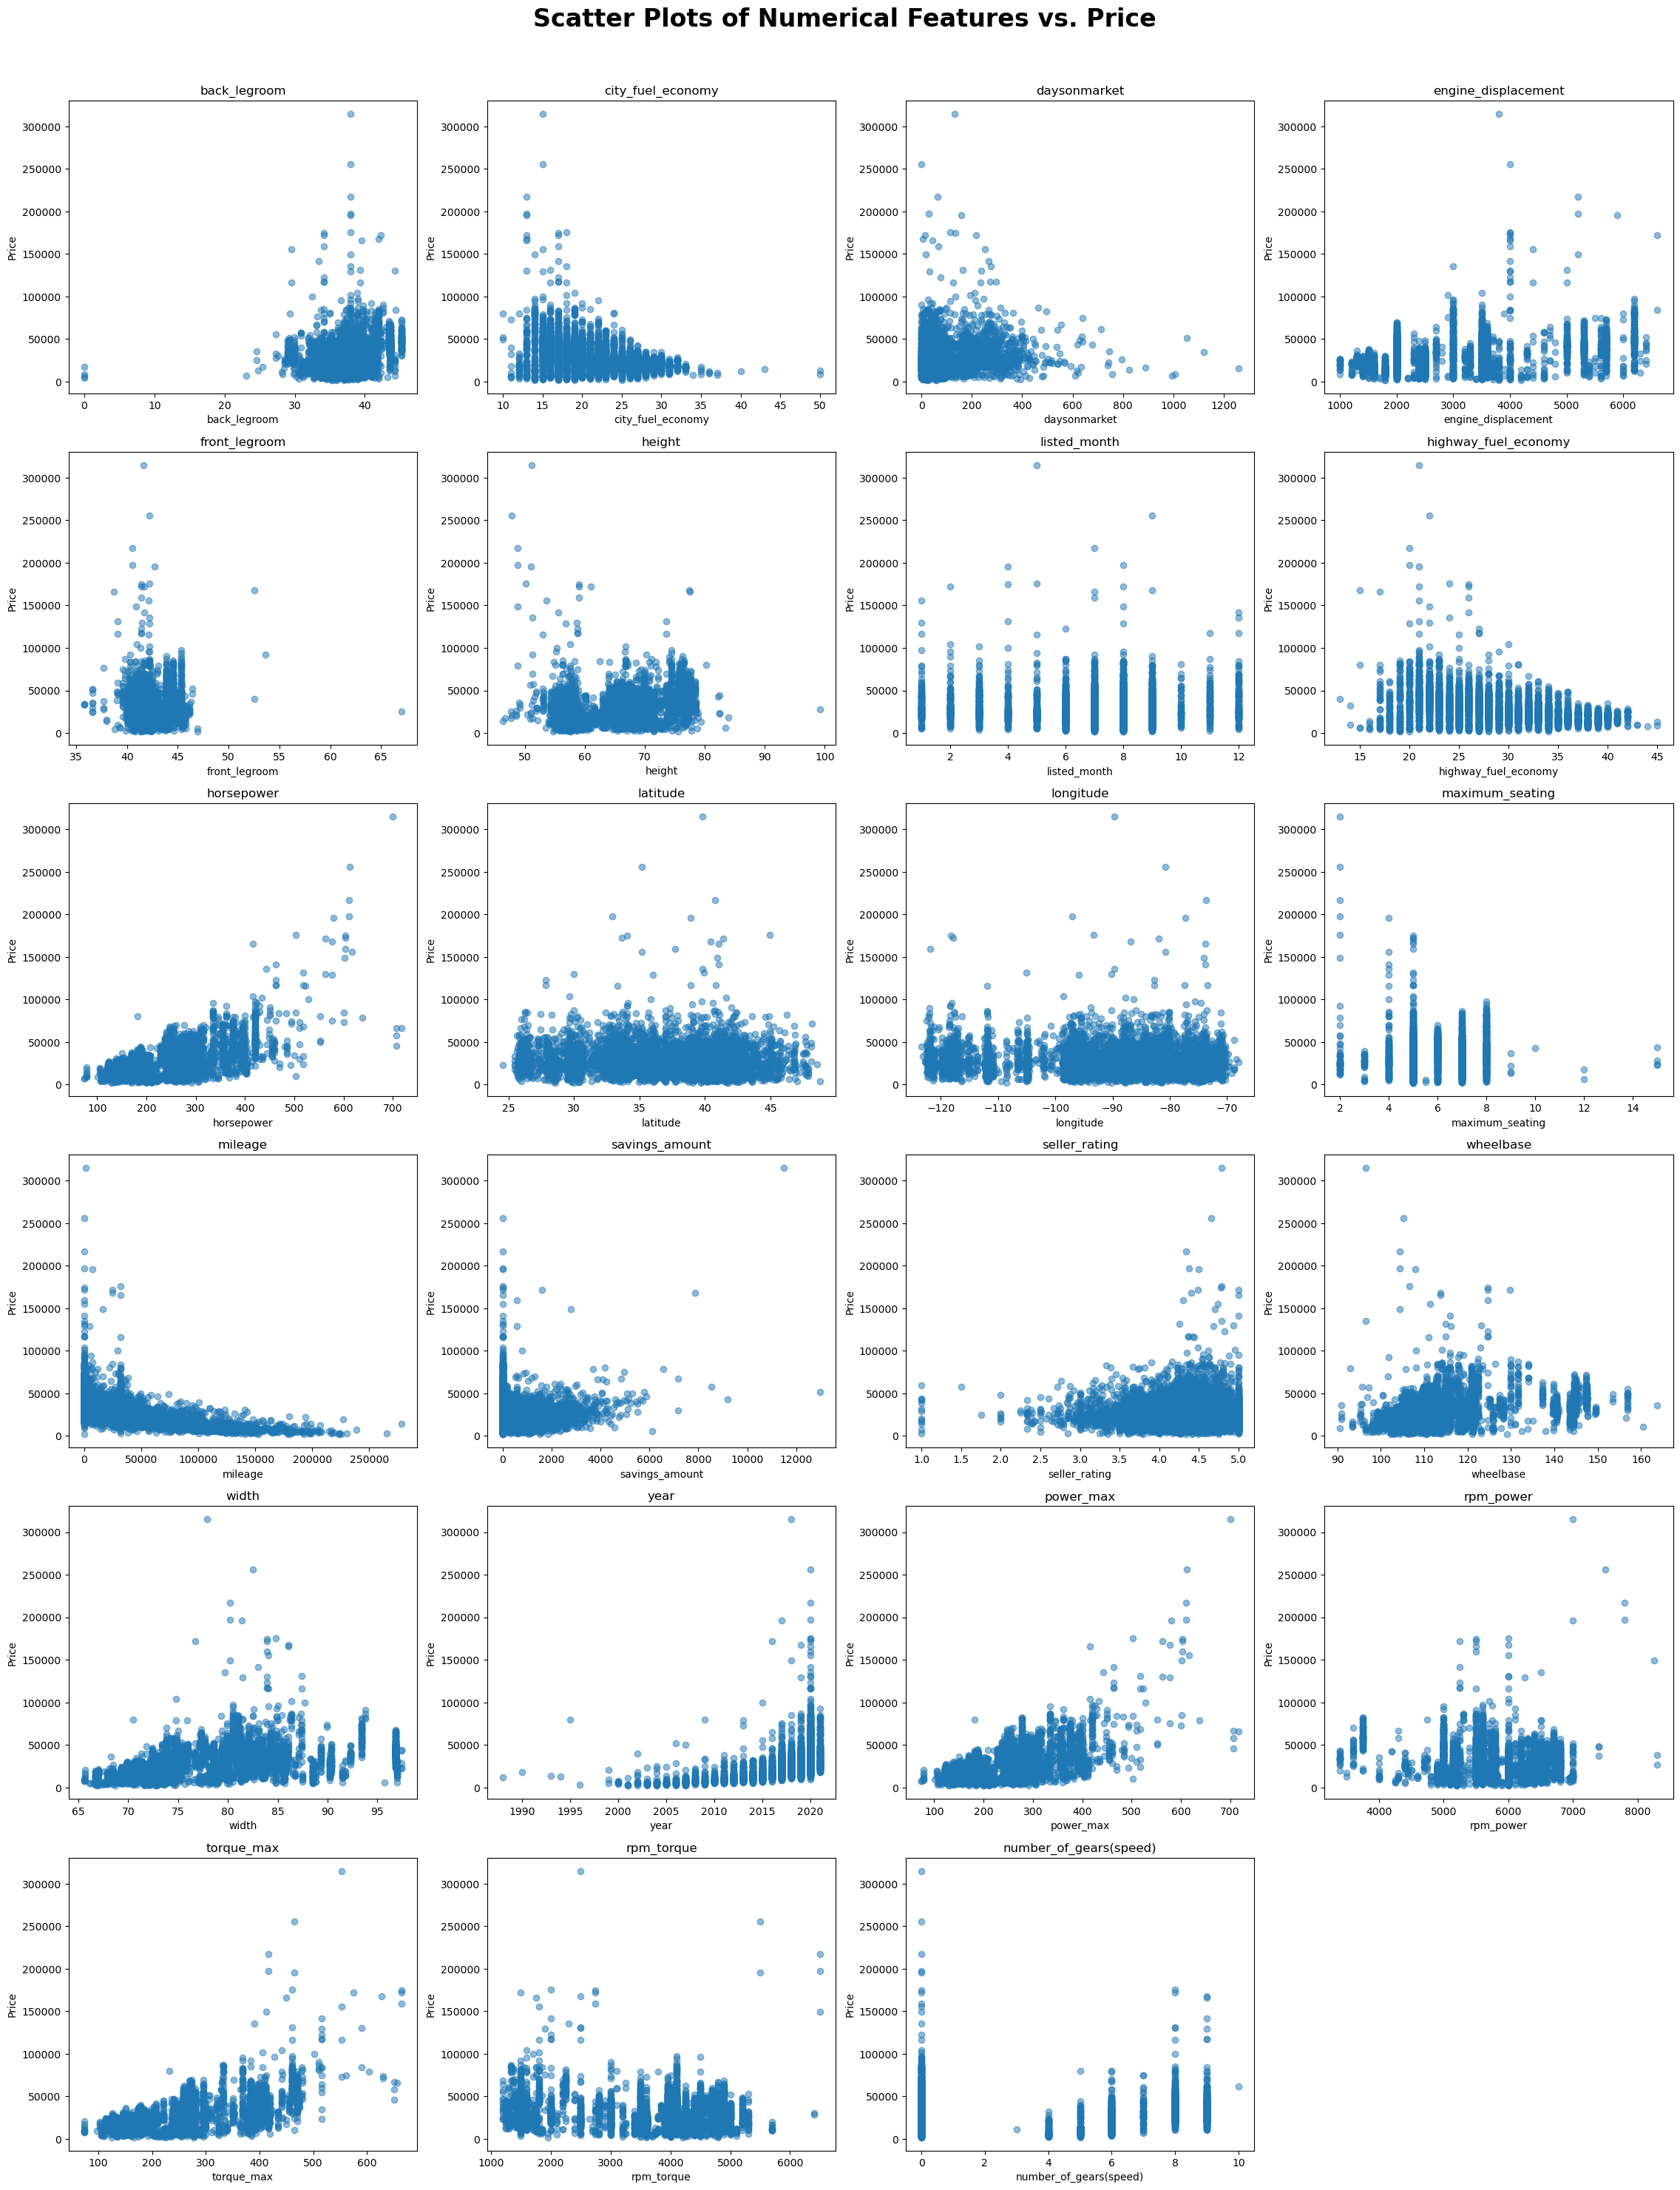

In [68]:
# Set up the number of rows and columns for the grid layout
num_features = len(numerical_features)
num_cols = 4  # Define the number of columns you want in the grid
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Calculate required rows

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(28, num_rows * 6))
axes = axes.flatten()  # Flatten axes for easy iteration

# Loop through each feature and create scatter plot in the corresponding subplot
for i, feature in enumerate(numerical_features):
    axes[i].scatter(X_train[feature], y_train, alpha=0.5, label='Data Points')
    axes[i].set_title(feature)  # Set title to feature name
    axes[i].set_xlabel(feature)  # Set x-axis label to feature name
    axes[i].set_ylabel('Price')  # Set y-axis label to indicate target variable (e.g., y_train)

# Hide any unused subplots (if num_features is not a perfect multiple of num_cols)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout
fig.suptitle('Scatter Plots of Numerical Features vs. Price', fontsize=24, y = 0.915, fontweight = 'bold')
plt.savefig('scatterplot', dpi=300, bbox_inches='tight')

The scatterplots are used to better visualise the relationship with the independent variables with the target 'Price'.

### Independent variables correlation matrix

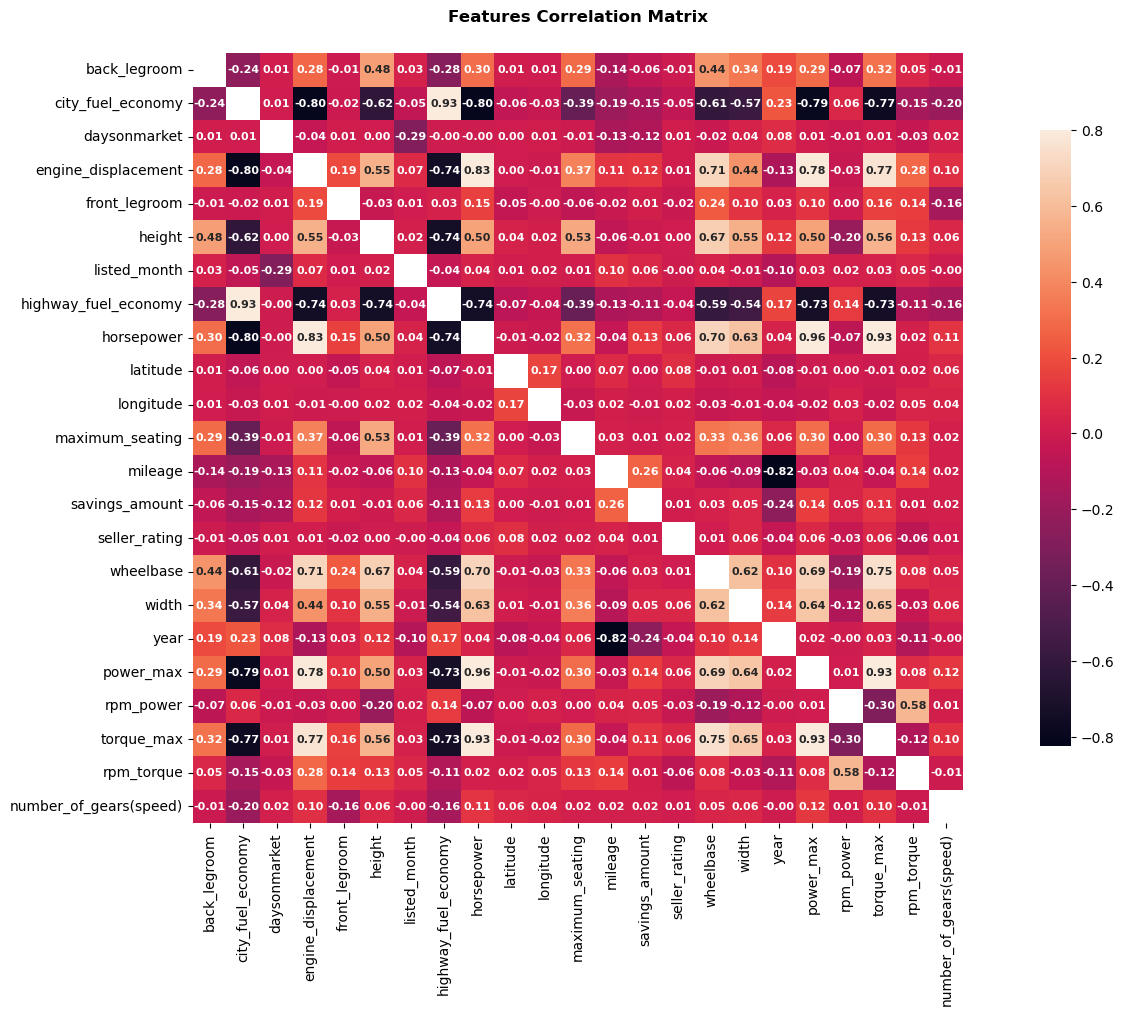

In [71]:
# Compute the correlation matrix
corrmat = X_train_scaled[numerical_features].corr()

# Create a mask to hide the diagonal in the main heatmap
mask = np.eye(len(corrmat), dtype=bool)

# Plot the main heatmap with masked diagonal
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(
    corrmat,
    mask=mask,  # Mask the diagonal
    annot=True,
    fmt=".2f",
    vmax=0.8,
    square=True,
    annot_kws={"size": 8, "weight": "bold"},
  # Use a color palette for correlations
    cbar_kws={'shrink': .8}  # Color bar customization
)
plt.title('Features Correlation Matrix', fontweight = 'bold', y = 1.03)
plt.savefig('corr matrix', dpi=300, bbox_inches='tight')

The correlation matrix, visualized as a heat map, highlights pairs of variables with high correlation coefficients (above 0.7 or below -0.7). This approach is valuable for identifying multicollinearity within the dataset, which is critical for selecting appropriate predictive models, especially in cases where highly correlated predictors can distort model accuracy. By masking the diagonal (where correlation equals 1.0), we can better distinguish significant correlation pairs without the visual clutter from constant values.

**Insights from the Price Relationship Chart and Correlation Matrix**

1. Powerful Engines and Price Relation:
   - Cars with more powerful engines, represented by higher values in horsepower, engine displacement, maximum torque, and power, are generally more expensive. This relationship suggests that engine specifications are a major contributor to a vehicle's market price.
   - However, these performance attributes exhibit a strong negative correlation with fuel-efficiency metrics of more than -70%. Thus, while high-performance vehicles are priced higher, they tend to be less fuel-efficient.
2. Torque and Power RPM Preferences:
   - Moderate negative correlations exist between RPMs (for both power and torque) and price, indicating a consumer preference for vehicles that reach higher peak power and torque at lower RPMs.
3. Mileage and Market Age Influence on Price:
   - Cars with higher mileage tend to be less expensive, reflecting the typical depreciation associated with higher usage.
   - Additionally, mileage shows a strong negative correlation with the year of the car's release, highlighting that newer vehicles command higher prices. This might present a preference for newer models, likely due to updated features, technology, or lower wear.

## **Model Selection**

### Lasso Regression
Given the presence of multicollinearity among multiple pairs of numerical features in the correlation matrix, a simple linear regression model may not perform well on this dataset. To address this, a regularised regression model is more suitable. We selected Lasso Regression because it applies L1 regularisation, which penalizes large coefficients by forcing some of them to zero. This approach reduces model complexity by automatically selecting relevant features, making it more robust in handling multicollinearity and improving generalisation.

In [76]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid_lasso, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_cv.fit(X_train_scaled, y_train)

# Get the best Lasso model and hyperparameters
best_lasso = lasso_cv.best_estimator_
print("Best Lasso Alpha:", lasso_cv.best_params_['alpha'])

# Evaluate Lasso model on the test set
y_train_pred_lasso = best_lasso.predict(X_train_scaled)
y_test_pred_lasso = best_lasso.predict(X_test_scaled)
mse_lassotr = mean_squared_error(y_train, y_train_pred_lasso)
r2_lassotr = r2_score(y_train, y_train_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
r2_lasso = r2_score(y_test, y_test_pred_lasso)

print(f'Lasso Regression - Train Mean Squared Error (MSE): {mse_lassotr:.4f}')
print(f'Lasso Regression - Train R-squared (R2): {r2_lassotr:.4f}')
print(f'Lasso Regression - Test Mean Squared Error (MSE): {mse_lasso:.4f}')
print(f'Lasso Regression - Test R-squared (R2): {r2_lasso:.4f}')

Best Lasso Alpha: 10
,Lasso Regression - Train Mean Squared Error (MSE): 87646667.4054
,Lasso Regression - Train R-squared (R2): 0.7231
,Lasso Regression - Test Mean Squared Error (MSE): 67488049.9627
,Lasso Regression - Test R-squared (R2): 0.7587


In [77]:
# Print Lasso coefficients
print("\nLasso Coefficients:")
for feature, coef in zip(X_train_scaled.columns, best_lasso.coef_):
    print(f"{feature}: {coef:.4f}")


,Lasso Coefficients:
,back_legroom: 758.1317
,city_fuel_economy: 2443.5099
,daysonmarket: 240.9465
,engine_displacement: -4866.5327
,front_legroom: 821.6888
,height: 1008.6178
,listed_month: 265.8723
,highway_fuel_economy: -2451.6166
,horsepower: 12869.0106
,latitude: -257.5952
,longitude: -517.9815
,maximum_seating: -490.7866
,mileage: -3271.4050
,savings_amount: 198.7475
,seller_rating: 856.8551
,wheelbase: -2243.5360
,width: -5.0127
,year: 2673.1905
,power_max: -14.5111
,rpm_power: -430.7680
,torque_max: 3603.2050
,rpm_torque: 299.2595
,number_of_gears(speed): -612.3803
,is_new_True: 6194.4691
,body_type_Pickup Truck: -4286.2415
,wheel_system_AWD: 1393.3142
,dealer_zip: -0.0126
,make_name_Other: 1657.0988
,wheel_system_FWD: -1582.4442
,body_type_SUV / Crossover: -1005.1406
,listing_color_UNKNOWN: 236.2770
,make_name_Ford: -6544.8317
,interior_color_Other: 651.5276
,engine_type_V6: -128.4127
,listing_color_WHITE: 6.6809
,listing_color_Other: -101.1471
,wheel_system_4X2: -2534.6610
,

The coefficient output shows that dealer_zip is not a relevant feature as its coefficient is set nearly to 0.

### Residual plot

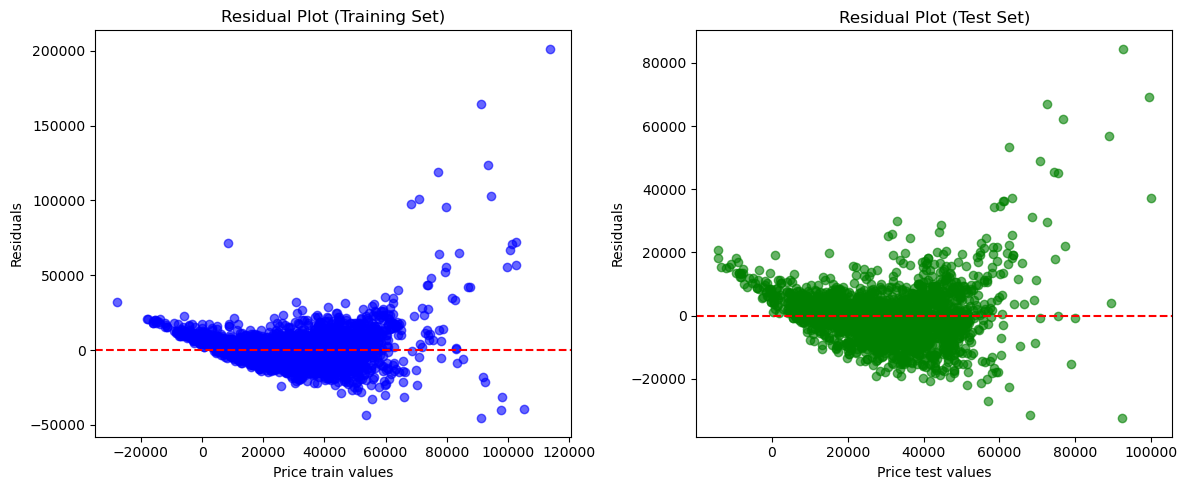

In [80]:
residuals_train = y_train - y_train_pred_lasso
residuals_test = y_test - y_test_pred_lasso

# Scatter plot of residuals for the training set
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_pred_lasso, residuals_train, alpha=0.6, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Price train values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Training Set)")

# Scatter plot of residuals for the test set
plt.subplot(1, 2, 2)
plt.scatter(y_test_pred_lasso, residuals_test, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Price test values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Test Set)")

plt.tight_layout()
plt.savefig('lasso residuals', dpi=300, bbox_inches='tight')
plt.show()

The residual plots exhibit a U-shaped (parabolic shape), indicating non-linearity in the dataset, which Lasso Regression cannot capture. Ideally, we want residuals to be randomly scattered around zero, meaning it has captured the underlying data pattern well. Fitting the data to a non-linear regression model should be a better prediction model for this dataset.

### Choose 3 models
- **Bagging**: Bagging involves training multiple instances of the same model on random subsets of the data with replacement, then averaging their predictions for regression tasks. This ensemble prediction reduces variance and improves stability, as well as is resilient to data noise. This will decrease overfitting and 

- **Random Forest**: Random Forest builds on bagging by adding random feature selection at each tree split, reducing correlations between individual trees. This additional randomness improves model accuracy and robustness that can generalise well

- **Stacked Regression with Bagging and Random Forest**: Stacking these methods combines their strengths—Bagging’s variance reduction and Random Forest’s feature selection—with a meta-model that learns the best way to blend their predictions. This often results in better performance by leveraging the unique strengths of each model to create a more accurate and robust prediction.

### Bagging Regressor

GridSearchCV is used to fine-tuned the hyperparameters by:
1. Define the hyperparameter grid
2. Set up the Grid Search (cv = 3, number of K-folds)
3. Fit the Grid Search to the data

We set the the number of K-fold equals to 3 as this requires less computational time and resources.

In [84]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Set up a DecisionTreeRegressor as the base estimator for Bagging
base_estimator = DecisionTreeRegressor(random_state=42)

# Initialize Bagging Regressor with the base estimator
bagging_model = BaggingRegressor(estimator=base_estimator, random_state=42)  # Change 'base_estimator' to 'estimator'

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],       # Number of base estimators in the ensemble
    'max_samples': [0.5, 1.0],       # Max samples to draw for each base estimator
    'max_features': [0.5, 1.0],      # Max features to draw for each base estimator
    'bootstrap': [True, False],           # Whether samples are drawn with replacement
    'bootstrap_features': [True, False],   # Whether features are drawn with replacement
    'estimator__max_depth': [5, 10, 15],          # Max depth for DecisionTreeRegressor
    'estimator__min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator from the grid search
best_bagging_model = grid_search.best_estimator_

best_bagging_model

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=15, random_state=42),
                 n_estimators=50, random_state=42)

In [227]:
# Evaluate the best model on the test set
y_train_predbg = best_bagging_model.predict(X_train_scaled)
y_test_predbg = best_bagging_model.predict(X_test_scaled)

msetrbg = mean_squared_error(y_train, y_train_predbg)
r2trbg = r2_score(y_train, y_train_predbg)
msebg = mean_squared_error(y_test, y_test_predbg)
r2bg = r2_score(y_test, y_test_predbg)

print(f"Train Mean Squared Error (MSE): {msetrbg:.2f}")
print(f"Train R-squared (R2): {r2trbg:.4f}")
print(f"Test Mean Squared Error (MSE): {msebg:.2f}")
print(f"Test R-squared (R2): {r2bg:.4f}")

Train Mean Squared Error (MSE): 6320567.64
,Train R-squared (R2): 0.9800
,Test Mean Squared Error (MSE): 24158360.66
,Test R-squared (R2): 0.9136


Bagging Regressor can generate numerous subsets of the training data by employing random sampling with replacement. This model combat overfitting by reducing the variance of the data and it

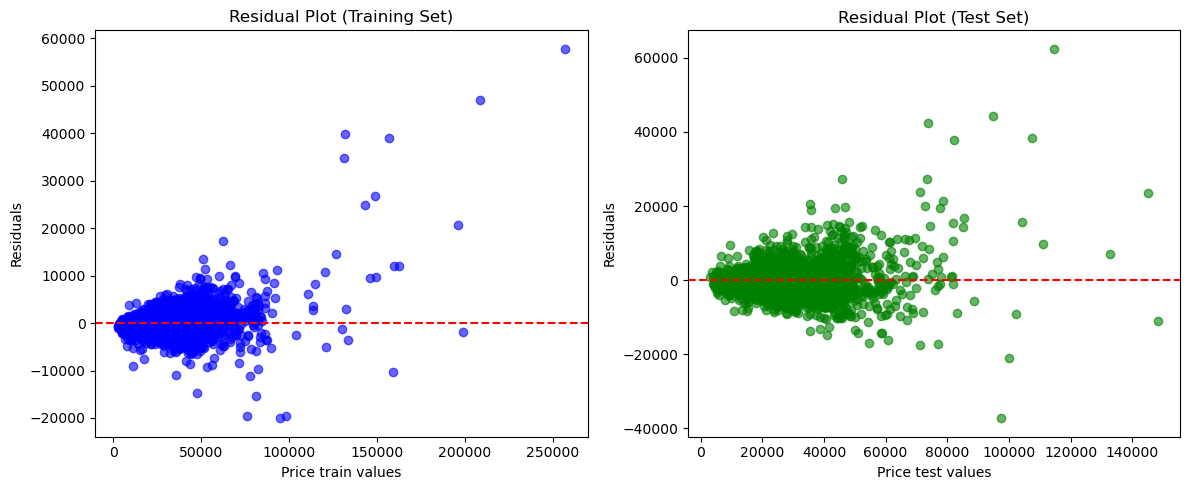

In [225]:
# Calculate residuals
residuals_train = y_train - y_train_predbg
residuals_test = y_test - y_test_predbg

# Scatter plot of residuals for the training set
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_predbg, residuals_train, alpha=0.6, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Price train values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Training Set)")

# Scatter plot of residuals for the test set
plt.subplot(1, 2, 2)
plt.scatter(y_test_predbg, residuals_test, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Price test values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Test Set)")

plt.tight_layout()
plt.savefig('residual plot bg', dpi=300, bbox_inches='tight')
plt.show()

The residual plots show that the Bagging Regressor model better captures the underlying data pattern as the residuals are scattered randomly. However, major outliers still exist in these residuals plot, indicading certain data points don't fit well with the model. Price data was also identified to be right-skewed.

### Random Forest Regression

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],         # Number of trees in the forest
    'max_depth': [10, 20, 30],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]           # Minimum samples required to be at a leaf node
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV with 10-fold cross-validation
grid_search_rf = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best estimator from grid search
best_rf = grid_search_rf.best_estimator_
best_rf

RandomForestRegressor(max_depth=30, n_estimators=50, random_state=42)

In [91]:
# Make predictions
y_train_pred_rf = best_rf.predict(X_train_scaled)
y_test_pred_rf = best_rf.predict(X_test_scaled)

# Calculate performance metrics
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# Display results
print(f'Training Mean Squared Error (MSE): {mse_train_rf:.3f}')
print(f'Training R-squared (R2): {r2_train_rf:.3f}')
print(f'Test Mean Squared Error (MSE): {mse_test_rf:.3f}')
print(f'Test R-squared (R2): {r2_test_rf:.3f}')

Training Mean Squared Error (MSE): 5222059.468
,Training R-squared (R2): 0.984
,Test Mean Squared Error (MSE): 25697508.808
,Test R-squared (R2): 0.908


### Stacked Regression (Random Forest Regression + Bagging Regressor)

In [92]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


# Define base regressors: Random Forest and Bagging Regressor with Decision Tree as the base estimator
base_regressors = [
    ('random_forest', RandomForestRegressor(max_depth=30, n_estimators=50, random_state=42)),
    ('bagging', BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42))
]

# Define the meta-regressor (Linear Regression in this example)
meta_regressor = LinearRegression()

# Initialize the Stacking Regressor
stacked_regressor = StackingRegressor(estimators=base_regressors, final_estimator=meta_regressor)

# Fit the stacking regressor
stacked_regressor.fit(X_train_scaled, y_train)

StackingRegressor(estimators=[('random_forest',
                               RandomForestRegressor(max_depth=30,
                                                     n_estimators=50,
                                                     random_state=42)),
                              ('bagging',
                               BaggingRegressor(estimator=DecisionTreeRegressor(),
                                                n_estimators=50,
                                                random_state=42))],
                  final_estimator=LinearRegression())

In [93]:
# Make predictions
y_train_pred_stack = stacked_regressor.predict(X_train_scaled)
y_test_pred_stack = stacked_regressor.predict(X_test_scaled)

# Calculate performance metrics
mse_train_stack = mean_squared_error(y_train, y_train_pred_stack)
r2_train_stack = r2_score(y_train, y_train_pred_stack)
mse_test_stack = mean_squared_error(y_test, y_test_pred_stack)
r2_test_stack = r2_score(y_test, y_test_pred_stack)

# Display results
print(f'Training Mean Squared Error (MSE): {mse_train_stack:.3f}')
print(f'Training R-squared (R2): {r2_train_stack:.3f}')
print(f'Test Mean Squared Error (MSE): {mse_test_stack:.3f}')
print(f'Test R-squared (R2): {r2_test_stack:.3f}')

Training Mean Squared Error (MSE): 4615819.444
,Training R-squared (R2): 0.985
,Test Mean Squared Error (MSE): 25062796.371
,Test R-squared (R2): 0.910


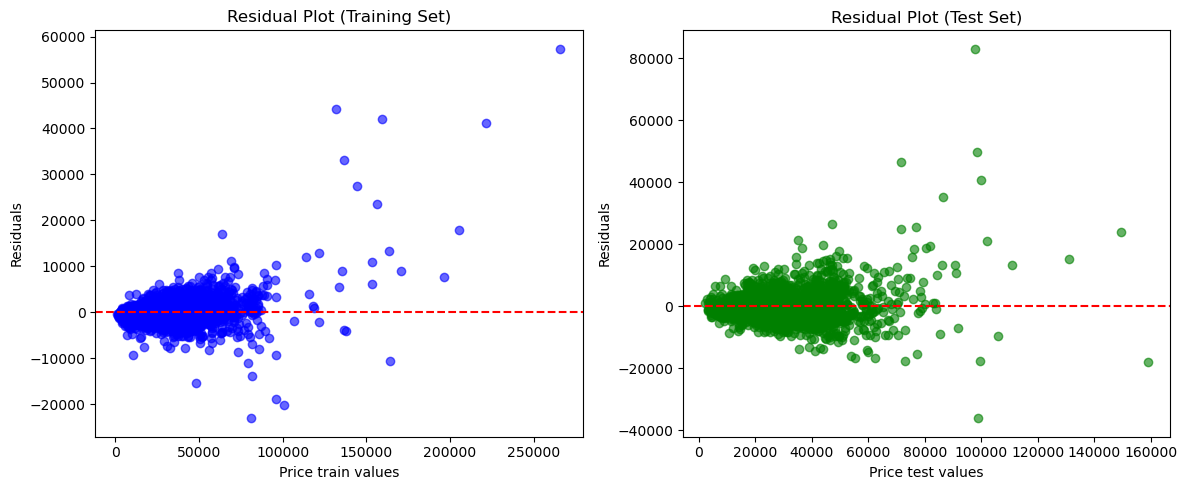

In [223]:
# Calculate residuals
residuals_train_stack = y_train - y_train_pred_stack
residuals_test_stack = y_test - y_test_pred_stack

# Scatter plot of residuals for the training set
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_pred_stack, residuals_train, alpha=0.6, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Price train values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Training Set)")

# Scatter plot of residuals for the test set
plt.subplot(1, 2, 2)
plt.scatter(y_test_pred_stack, residuals_test, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Price test values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Test Set)")

plt.tight_layout()
plt.savefig('residual plot stack', dpi=300, bbox_inches='tight')
plt.show()

The residual plots of the Stacked Regression model yield approximately similar result to the Bagging Regressor model.

### Model Comparison

| Metric                  | Random Forest Regression                | Bagging Regressor                               | Stacking Regressor                         |
|-------------------------|---------------------------------|------------------------------------------------|--------------------------------------------|
| **Optimal Hyperparameters** | Max Depth = 30, N Estimators = 50                     | Max Depth = 15, N Estimators = 50               | Random Forest (Max Depth = 30, N Estimators = 50), Bagging (Decision Tree) |
| **Training MSE**        | 5,222,059.468                | 6,320,567.64                                   | 4,615,819.444                              |
| **Test MSE**            | 25,697,508.808                | 24,158,360.66                                  | 25,062,796.371                             |
| **Training R²**         | 0.984                          | 0.9800                                         | 0.985                                      |
| **Test R²**             | 0.908                          | 0.9136                                         | 0.910                                      |


This model comparison table displays the performance metrics for three regression methods: Random Forest, Bagging Regressor, and Stacking Regressor.

- Random Forest and Bagging Regressor both have high training R² values (0.984 and 0.980, respectively), showing they match the training data well. However, Bagging has a slightly higher Test R² (0.9136) than Random Forest (0.908), indicating greater generalization to unseen data.
- The Stacking Regressor achieves balanced performance, with a Test R² of 0.910 and the lowest Training MSE (4,615,819.444) and highest training R² (0.985). This implies that combining Random Forest and Bagging minimizes training error while maintaining competitive test performance, giving it the overall best performing model over the other two.

## **Fit to test data**

In [99]:
# Make predictions on the test data
y_testdata_pred_stack = stacked_regressor.predict(X_testdata_scaled)

# Create a DataFrame with 'vin' and 'Predicted_Price'
test_fit_stack = pd.DataFrame({
    'vin': test_vin.values,       # Use .values to add as a column without index mismatch
    'price': y_testdata_pred_stack    # Predictions from the model
})

# Display the resulting DataFrame
test_fit_stack

,vin,price
0,5J8YD4H05LL032532,56698.926348
1,KNAE45LC8K6050784,52290.823084
2,5XYZGDABXCG149606,6477.371731
3,1G1ZE5ST6HF197903,16684.397154
4,KL4MMDSL6LB106699,24259.656959
...,...,...
3995,1C4NJRBB4FD168294,11479.660330
3996,1GCRWBEHXLZ340420,36540.020980
3997,5N1DR2MN1KC639932,27881.874347
3998,KNDJ33AUXM7127740,19908.893282


We then fit the Stacked Regression model to the test dataset. A new dataframe is created to store 2 columns: the 'vin' column and the predicted price column.

In [101]:
# Export CSV file for the model using Stacking Regression
test_fit_stack.to_csv('solution6.csv', index=False)

## **Log-transform the dataset**

Since there are many big residuals in the residual plots for both 3 model, this indicates that there might be outliers that the model could not generalise well. Furthermore, the above histogram shows many right-skewed features that might be affecting the performance of the regression models. Thus, we performed log-transformation on the dataset.

In [103]:
#Copy original dataset to a new dataframe
df = train_encoded.copy()
# List of columns to log transform
log_columns = [
    'daysonmarket',
    'engine_displacement',
    'mileage',
    'savings_amount',
    'highway_fuel_economy',
    'city_fuel_economy',
    'price',
    'back_legroom',
    'torque_max',
    'rpm_torque',
    'rpm_power',
    'horsepower',
    'wheelbase',
    'width',
    'height',
    'power_max',
    'seller_rating',
]

# Apply log transformation with a small constant to avoid log(0) issues
for col in log_columns:
    df[col] = np.log1p(df[col])  # log1p(x) is equivalent to log(x + 1)

# Verify transformation by checking the head of the transformed columns
print(df[log_columns].head())

   daysonmarket  engine_displacement    mileage  savings_amount  \
,0      3.610918             8.294300  12.327852        7.138073   
,1      6.056784             7.783641   2.639057        0.000000   
,2      1.791759             8.216358  10.941270        6.932448   
,3      3.135494             7.313887   0.000000        0.000000   
,4      4.060443             8.732466   1.386294        0.000000   
,
,   highway_fuel_economy  city_fuel_economy      price  back_legroom  \
,0              3.044522           2.833213   9.602450      3.572346   
,1              3.465736           3.135494  10.182860      3.720862   
,2              3.258097           2.944439   9.546884      3.575151   
,3              3.496508           3.332205  10.177096      3.723281   
,4              3.135494           2.833213  10.804137      3.793239   
,
,   torque_max  rpm_torque  rpm_power  horsepower  wheelbase     width  \
,0    5.587249    8.294300   8.556606    5.468060   4.707727  4.333361   
,1    5.4

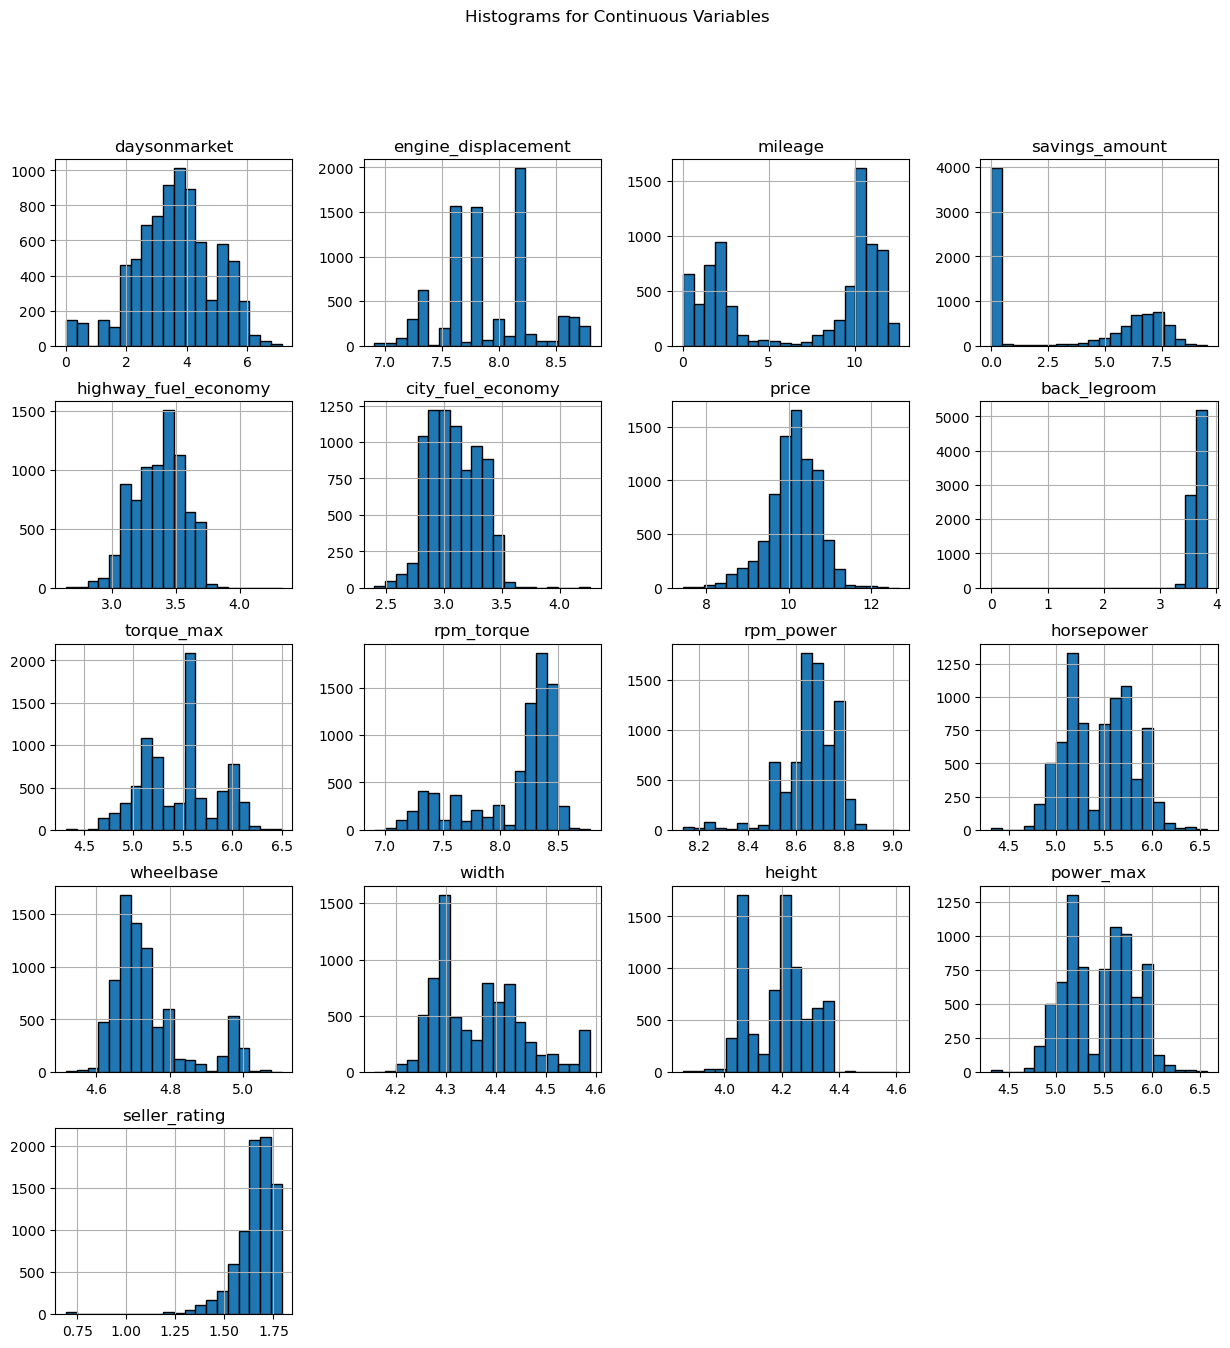

In [208]:
df[log_columns].hist(bins=20, figsize=(15, 15), edgecolor='black')
plt.suptitle('Histograms for Continuous Variables')
plt.savefig('Histogram', dpi = 300, bbox_inches='tight')
plt.show()

The histograms of the distribution of these variables demonstrates a relatively more symmertrical shape. This reduces the effect of outliers on the performance of regression models when fitting to these variables.

In [231]:
#Concatenate the log values to the dataframe
df_log = pd.concat([df[log_columns], df.drop(columns=log_columns)], axis=1)

In [106]:
#Copy original dataset to a new dataframe
df_test = test_encoded.copy()

# Apply log transformation with a small constant to avoid log(0) issues
for col in log_columns:
    df_test[col] = np.log1p(df_test[col])  # log1p(x) is equivalent to log(x + 1)
df_test_log = pd.concat([df_test[log_columns], df_test.drop(columns=log_columns)], axis=1)
df_test_log

,daysonmarket,engine_displacement,mileage,savings_amount,highway_fuel_economy,city_fuel_economy,price,back_legroom,torque_max,rpm_torque,...,model_name_Rogue,model_name_Silverado 1500,model_name_Trax,transmission_CVT,transmission_Dual Clutch,transmission_M,wheel_system_4X2,wheel_system_AWD,wheel_system_FWD,wheel_system_RWD
0,3.931826,8.160804,0.000000,0.000000,3.258097,2.995732,0.0,3.627004,5.590987,8.455531,...,0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.688879,8.101981,10.077273,6.562444,3.258097,2.890372,0.0,3.621671,5.932245,7.170888,...,0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.110874,7.783641,11.924055,6.767343,3.258097,3.044522,0.0,3.632309,5.135798,8.229778,...,0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.098612,7.313887,10.513579,3.258097,3.610918,3.332205,0.0,3.666122,5.220356,7.824446,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.955827,7.170888,1.791759,0.000000,3.496508,3.433987,0.0,3.610918,5.164786,7.313887,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2.397895,7.783641,11.408698,6.077642,3.332205,3.135494,0.0,3.698830,5.111988,8.389587,...,0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3996,2.564949,8.366603,10.337291,0.000000,3.091042,2.833213,0.0,3.589059,5.950643,8.318986,...,0,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3997,3.555348,8.160804,9.818256,6.599870,3.332205,3.044522,0.0,3.754199,5.560682,8.476580,...,0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3998,3.850148,7.601402,2.397895,0.000000,3.526361,3.367296,0.0,3.683867,4.890349,8.412055,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [107]:
X_log = df_log.drop(columns='price')
y_log = df_log['price']
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.3, random_state=42)
X_train_log, df_test_log = X_train_log.align(df_test_log, join='left', axis=1, fill_value=0)

In [108]:
rf_log = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit model to training data
rf_log.fit(X_train_log, y_train_log)

# Get feature importances
importances_log = rf_log.feature_importances_

# Create a DataFrame with feature importances
importances_df_log = pd.DataFrame({'feature': X_train_log.columns, 'importance': importances})

# Sort features by importance in descending order
importances_df_log = importances_df_log.sort_values(by='importance', ascending=False).reset_index(drop=True)

# Create a cumulative importance column in importance_df
importances_df_log['cum_importance'] = importances_df_log['importance'].cumsum()

# Filter features based on cumulative importance (e.g., threshold = 0.995)
importances_df_filtered_log = importances_df_log[importances_df_log['cum_importance'] <= 0.995]

# Save the list of variables that have significant importance
filtered_features_log = importances_df_filtered_log['feature'].tolist()

# Display the filtered features
print("Filtered Features based on cumulative importance:")
print(importances_df_filtered_log)

Filtered Features based on cumulative importance:
,                      feature  importance  cum_importance
,0             maximum_seating    0.216049        0.216049
,1                  rpm_torque    0.211997        0.428046
,2                       width    0.151741        0.579787
,3               front_legroom    0.102879        0.682666
,4                    latitude    0.086482        0.769148
,5                        year    0.029770        0.798918
,6               seller_rating    0.017968        0.816886
,7        highway_fuel_economy    0.014003        0.830889
,8                   longitude    0.013234        0.844123
,9                back_legroom    0.011925        0.856048
,10                 dealer_zip    0.011095        0.867143
,11                is_new_True    0.010642        0.877786
,12                  power_max    0.010015        0.887800
,13                     height    0.009355        0.897155
,14                  wheelbase    0.009065        0.906220
,15   

In [109]:
# Instantiate the scaler
scaler = StandardScaler()

# Scale the numerical features for train, test, and testdata
X_train_scaled_numerical_log = scaler.fit_transform(X_train_log[numerical_features])
X_test_scaled_numerical_log = scaler.transform(X_test_log[numerical_features])
X_testdata_scaled_numerical_log = scaler.transform(df_test_log[numerical_features])

# Convert scaled numerical features to DataFrames with the same column names and indices
X_train_scaled_numerical_log = pd.DataFrame(X_train_scaled_numerical_log, columns=numerical_features, index=X_train_log.index)
X_test_scaled_numerical_log = pd.DataFrame(X_test_scaled_numerical_log, columns=numerical_features, index=X_test_log.index)
X_testdata_scaled_numerical_log = pd.DataFrame(X_testdata_scaled_numerical_log, columns=numerical_features, index=df_test_log.index)

# Combine scaled numerical features with remaining unscaled features
X_train_scaled_log = pd.concat([X_train_scaled_numerical_log, X_train_log[filtered_features_log].drop(columns=numerical_features)], axis=1)
X_test_scaled_log = pd.concat([X_test_scaled_numerical_log, X_test_log[filtered_features_log].drop(columns=numerical_features)], axis=1)
X_testdata_scaled_log = pd.concat([X_testdata_scaled_numerical_log, df_test_log[filtered_features_log].drop(columns=numerical_features)], axis=1)

### Tuning Hyperparameters and Cross-validation for Bagging Regressor and Random Forest Regression

In [111]:
# Set up a DecisionTreeRegressor as the base estimator for Bagging
base_estimator = DecisionTreeRegressor(random_state=42)

# Initialize Bagging Regressor with the base estimator
bagging_model = BaggingRegressor(estimator=base_estimator, random_state=42)  # Change 'base_estimator' to 'estimator'

# Define the parameter grid for hyperparameter tuning
param_grid_log = {
    'n_estimators': [50, 100],       # Number of base estimators in the ensemble
    'max_samples': [0.5, 1.0],       # Max samples to draw for each base estimator
    'max_features': [0.5, 1.0],      # Max features to draw for each base estimator
    'bootstrap': [True, False],           # Whether samples are drawn with replacement
    'bootstrap_features': [True, False],   # Whether features are drawn with replacement
    'estimator__max_depth': [5, 10, 15],          # Max depth for DecisionTreeRegressor
    'estimator__min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV with 10-fold cross-validation
grid_search_log = GridSearchCV(estimator=bagging_model, param_grid=param_grid_log, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_log.fit(X_train_scaled_log, y_train_log)

# Get the best estimator from the grid search
best_bagging_model_log = grid_search_log.best_estimator_

best_bagging_model_log

BaggingRegressor(bootstrap=False, bootstrap_features=True,
                 estimator=DecisionTreeRegressor(max_depth=15, random_state=42),
                 n_estimators=100, random_state=42)

In [112]:
# Define the parameter grid for hyperparameter tuning
param_grid_rf_log = {
    'n_estimators': [50, 100],         # Number of trees in the forest
    'max_depth': [10, 20, 30],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]           # Minimum samples required to be at a leaf node
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV with 10-fold cross-validation
grid_search_rf_log = GridSearchCV(rf, param_grid_rf_log, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf_log.fit(X_train_scaled_log, y_train_log)

# Get the best estimator from grid search
best_rf_log = grid_search_rf_log.best_estimator_
best_rf_log

RandomForestRegressor(max_depth=30, random_state=42)

In [113]:
print(grid_search_rf_log.best_params_)

{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [115]:
# Define base regressors: Random Forest and Bagging Regressor with Decision Tree as the base estimator
base_regressors_log = [
    ('random_forest', RandomForestRegressor(max_depth=30, n_estimators=100, random_state=42)),
    ('bagging', BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42))
]

# Define the meta-regressor (Linear Regression in this example)
meta_regressor = LinearRegression()

# Initialize the Stacking Regressor
stacked_regressor_log = StackingRegressor(estimators=base_regressors, final_estimator=meta_regressor)

# Fit the stacking regressor
stacked_regressor_log.fit(X_train_scaled_log, y_train_log)

StackingRegressor(estimators=[('random_forest',
                               RandomForestRegressor(max_depth=30,
                                                     n_estimators=50,
                                                     random_state=42)),
                              ('bagging',
                               BaggingRegressor(estimator=DecisionTreeRegressor(),
                                                n_estimators=50,
                                                random_state=42))],
                  final_estimator=LinearRegression())

In [116]:
# Make predictions
y_train_pred_stack_log = stacked_regressor_log.predict(X_train_scaled_log)
y_test_pred_stack_log = stacked_regressor_log.predict(X_test_scaled_log)

# Calculate performance metrics
mse_train_stack_log = mean_squared_error(y_train_log, y_train_pred_stack_log)
r2_train_stack_log = r2_score(y_train_log, y_train_pred_stack_log)
mse_test_stack_log = mean_squared_error(y_test_log, y_test_pred_stack_log)
r2_test_stack_log = r2_score(y_test_log, y_test_pred_stack_log)

# Display results
print(f'Training Mean Squared Error (MSE): {mse_train_stack_log:.3f}')
print(f'Training R-squared (R2): {r2_train_stack_log:.3f}')
print(f'Test Mean Squared Error (MSE): {mse_test_stack_log:.3f}')
print(f'Test R-squared (R2): {r2_test_stack_log:.3f}')

Training Mean Squared Error (MSE): 0.004
,Training R-squared (R2): 0.989
,Test Mean Squared Error (MSE): 0.027
,Test R-squared (R2): 0.921


In [120]:
test_fit_stack_log.to_csv('solution7.csv', index = False)

In [121]:
# Make predictions
y_train_pred_log = best_bagging_model_log.predict(X_train_scaled_log)
y_test_pred_log = best_bagging_model_log.predict(X_test_scaled_log)

# Calculate performance metrics
mse_train_log = mean_squared_error(y_train_log, y_train_pred_log)
r2_train_log = r2_score(y_train_log, y_train_pred_log)
mse_test_log = mean_squared_error(y_test_log, y_test_pred_log)
r2_test_log = r2_score(y_test_log, y_test_pred_log)

# Display results
print(f'Training Mean Squared Error (MSE): {mse_train_log:.3f}')
print(f'Training R-squared (R2): {r2_train_log:.3f}')
print(f'Test Mean Squared Error (MSE): {mse_test_log:.3f}')
print(f'Test R-squared (R2): {r2_test_log:.3f}')

Training Mean Squared Error (MSE): 0.001
,Training R-squared (R2): 0.997
,Test Mean Squared Error (MSE): 0.027
,Test R-squared (R2): 0.922


### Pre Log-transformed and Log-transformed Model Comparison

| Metric              | Bagging Regressor      | Stacked Regression       | Log Bagging           | Log Stacked          |
|---------------------|------------------------|---------------------------|-----------------------|-----------------------|
| Training MSE        | 6,320,567.64           | 4,615,819.444            | 0.001                 | 0.004                |
| Test MSE            | 24,158,360.66          | 25,062,796.371           | 0.027                 | 0.027                |
| Training R²         | 0.980                  | 0.985                    | 0.997                 | 0.989                |
| Test R²             | 0.9136                 | 0.910                    | 0.922                 | 0.921                |

This table provides a comparison of performance metrics across four regression models: Bagging Regressor, Stacked Regression, Log-transformed Bagging (Log Bagging), and Log-transformed Stacked Regression (Log Stacked).

- The Log-transformed models (Log Bagging and Log Stacked) show significantly lower Training and Test MSE compared to non-log models, indicating improved handling of data variance and potentially outliers.
- Training R² values are very high across all models, with Log Bagging showing the highest at 0.997, suggesting an excellent fit to the training data.
- Test R² values are also slightly improved in the log-transformed models (0.922 for Log Bagging and 0.921 for Log Stacked), indicating better generalization compared to the untransformed models.

Overall, the log-transformed models (especially Log Bagging) achieve the best performance, likely due to the reduction in the influence of outliers and variance stabilization.

In [122]:
# Make predictions on the test data
y_testdata_pred_log = best_bagging_model_log.predict(X_testdata_scaled_log)

# Create a DataFrame with 'vin' and 'Predicted_Price'
test_fit_log = pd.DataFrame({
    'vin': test_vin.values,       # Use .values to add as a column without index mismatch
    'price': y_testdata_pred_log    # Predictions from the model
})

test_fit_log['price'] = np.expm1(test_fit_log['price'])
test_fit_log

,vin,price
0,5J8YD4H05LL032532,55470.329966
1,KNAE45LC8K6050784,31058.186601
2,5XYZGDABXCG149606,6574.458686
3,1G1ZE5ST6HF197903,17324.768116
4,KL4MMDSL6LB106699,24802.639723
...,...,...
3995,1C4NJRBB4FD168294,11750.964309
3996,1GCRWBEHXLZ340420,34467.271254
3997,5N1DR2MN1KC639932,28245.226043
3998,KNDJ33AUXM7127740,20042.336343


Revert the log-transformed of the 'Price' variable by using $e^x -1$ to revert $log(x+1)$

In [123]:
test_fit_log.to_csv('solution8.csv', index = False)

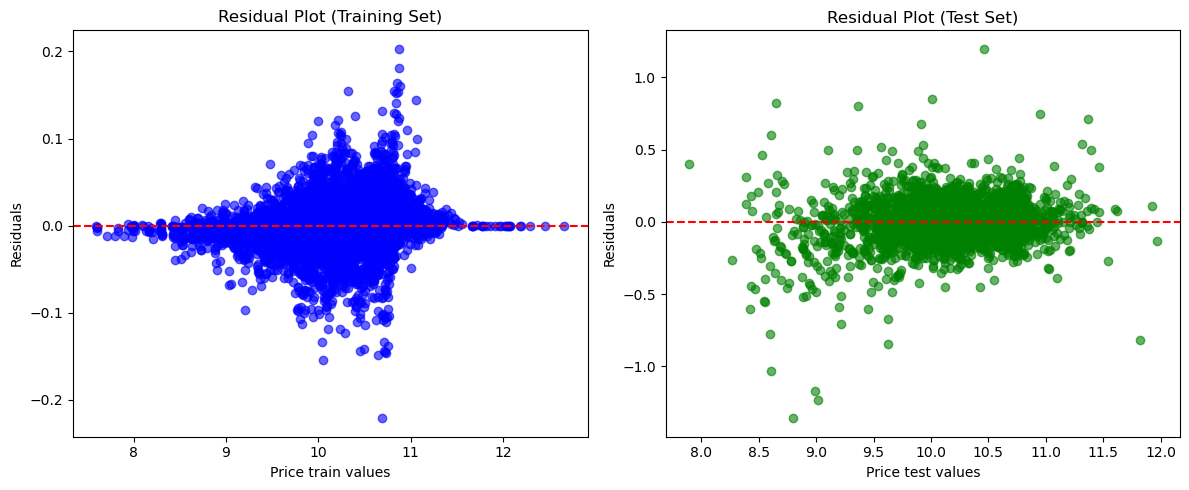

In [124]:
# Calculate residuals
residuals_train = y_train_log - y_train_pred_log
residuals_test = y_test_log - y_test_pred_log

# Scatter plot of residuals for the training set
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_pred_log, residuals_train, alpha=0.6, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Price train values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Training Set)")

# Scatter plot of residuals for the test set
plt.subplot(1, 2, 2)
plt.scatter(y_test_pred_log, residuals_test, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Price test values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Test Set)")

plt.tight_layout()
plt.savefig('residual plot bg log', dpi=300, bbox_inches='tight')
plt.show()

With log transformation. it has significantly reduced the extend of outliers, making most data points scatter around the zero lines in both traning and test sets. The residuals in the test set are more spread out compared to the training set, with several visible outliers above and below the dashed zero line. 

In [125]:
test_fit_log.to_csv('solution9.csv', index = False)